In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = np.random.randint(1, 7, 1000)

4 dies are rolled. If a six is in the four dies then you win.

In [3]:
a.reshape((-1, 4))

array([[4, 6, 3, 6],
       [4, 4, 6, 2],
       [6, 3, 2, 2],
       [5, 3, 5, 1],
       [4, 4, 6, 1],
       [2, 6, 1, 2],
       [4, 3, 1, 5],
       [1, 5, 1, 5],
       [4, 6, 6, 6],
       [5, 1, 2, 4],
       [2, 5, 4, 6],
       [6, 3, 5, 3],
       [3, 1, 2, 3],
       [4, 4, 5, 5],
       [2, 6, 1, 6],
       [5, 3, 3, 6],
       [3, 6, 2, 6],
       [5, 3, 1, 4],
       [3, 5, 4, 3],
       [6, 6, 4, 5],
       [2, 4, 3, 2],
       [5, 4, 6, 3],
       [5, 4, 3, 2],
       [6, 2, 1, 6],
       [6, 3, 4, 5],
       [2, 3, 4, 1],
       [1, 2, 1, 4],
       [6, 5, 4, 1],
       [4, 2, 3, 4],
       [4, 4, 6, 1],
       [2, 3, 6, 6],
       [6, 6, 6, 2],
       [6, 2, 1, 3],
       [6, 2, 2, 6],
       [3, 2, 3, 4],
       [4, 2, 1, 1],
       [4, 4, 2, 2],
       [4, 5, 5, 3],
       [3, 5, 2, 1],
       [6, 4, 1, 2],
       [2, 1, 4, 3],
       [3, 4, 4, 5],
       [2, 5, 3, 1],
       [1, 5, 4, 5],
       [6, 3, 6, 4],
       [6, 5, 4, 4],
       [1, 5, 5, 6],
       [4, 1,

In [18]:
trials = 1000
experiments = 300
allprobs = []
for i in range(experiments):
    a = np.random.randint(1, 7, 4 * trials)
    allprobs.append(len([x for x in a.reshape((-1, 4)) if 6 in x]) / trials)

In [19]:
sum(allprobs) / experiments

0.51795

(array([  1.,   8.,  19.,  34.,  68.,  76.,  42.,  29.,  19.,   4.]),
 array([ 0.472 ,  0.4807,  0.4894,  0.4981,  0.5068,  0.5155,  0.5242,
         0.5329,  0.5416,  0.5503,  0.559 ]),
 <a list of 10 Patch objects>)

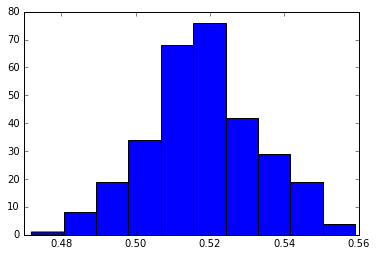

In [20]:
plt.hist(allprobs)

In [24]:
trials = 1000
experiments = 300
allprobs = []

for i in range(experiments):
    a = np.random.randint(1, 7, 24 * trials)
    b = np.random.randint(1, 7, 24 * trials)

    a.reshape((-1, 24))
    b.reshape((-1, 24))
    vals = []
    for i in range(len(a)):
        if a[i] == 6 and a[i] == b[i]:
            vals.append(a)
    allprobs.append(len(vals)/trials)        

print(a, b)


sum(allprobs)/experiments

[2 2 4 ..., 2 1 4] [6 6 3 ..., 2 5 6]


0.6674433333333333

Prob should be 0.489.....

In [30]:
allprobs = []
trials = 1000
experiments = 300
for i in range(experiments):
    count = 0
    for t in [e for e in np.random.randint(1, 7, 48 * trials).reshape((-1, 24, 2))]:
        found = False
        for p in t:
            if p[0] == 6 and p[1] == 6:
                found = True
        if found:
            count += 1    
    allprobs.append(count / trials)

In [31]:
sum(allprobs)/experiments

0.49248333333333355

(array([  1.,   9.,  18.,  42.,  67.,  71.,  48.,  29.,  11.,   4.]),
 array([ 0.442 ,  0.4517,  0.4614,  0.4711,  0.4808,  0.4905,  0.5002,
         0.5099,  0.5196,  0.5293,  0.539 ]),
 <a list of 10 Patch objects>)

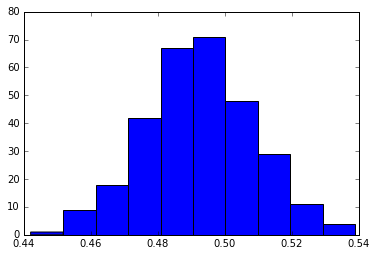

In [32]:
plt.hist(allprobs)

# Gambler's Ruin

In [26]:
trials = 500
time = 500
init = 20
overall = []
for t in range(trials):
    initial = [init]
    for i in range(time):
        if np.random.random() > 0.517:
            initial.append(initial[-1] + 1)
        else:
            initial.append(initial[-1] - 1)
        if initial[-1] == 0:
            break
    if len(initial) < time + 1:
        initial += [0] * (time + 1 - len(initial))
    overall.append(initial)

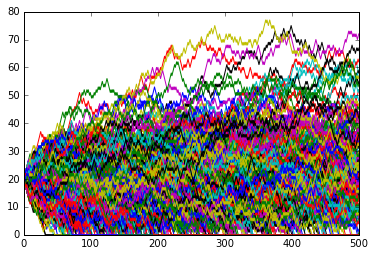

In [27]:
b = np.linspace(0, time, time + 1)
for o in overall:
    plt.plot(b, o)

In [28]:
aves = []
n = np.array(overall)
for i in range(time + 1):
    t = n[:, i]
    aves.append(sum(t)/ trials)

In [33]:
ends = []
for o in overall:
    ends.append(o[-1])

(array([ 331.,   32.,   37.,   45.,   19.,   15.,    9.,    7.,    3.,    2.]),
 array([  0. ,   7.2,  14.4,  21.6,  28.8,  36. ,  43.2,  50.4,  57.6,
         64.8,  72. ]),
 <a list of 10 Patch objects>)

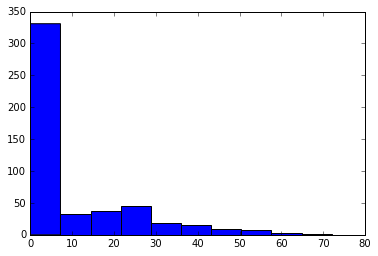

In [34]:
plt.hist(ends)

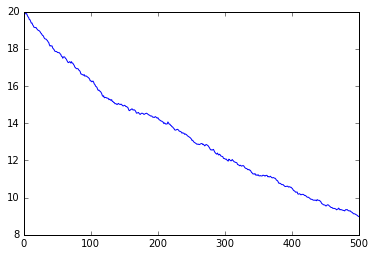

In [29]:
plt.plot(aves)

In [100]:
timeSteps = 100
trials = 200
init = 0
allpoints = []

def direct(randNum):
    if randNum < .25:
        return 'S'
    elif .5 > randNum >= .25:
        return 'N'
    elif .75 > randNum >= .5:
        return 'E'
    return 'W'

for t in range(trials):
    trial = []
    trial.append((0, 0))
    for i in range(timeSteps):
        rand = np.random.random(1)
        drct = direct(rand)

        if drct == 'S':
            temp = (trial[-1][0] - 1, trial[-1][1])
        elif drct == 'N':
            temp = (trial[-1][0] + 1, trial[-1][1])
        elif drct == 'E':
            temp = (trial[-1][0], trial[-1][1] + 1)
        else:
            temp = (trial[-1][0], trial[-1][1] - 1)

        trial.append(temp)
    allpoints.append(trial)
    

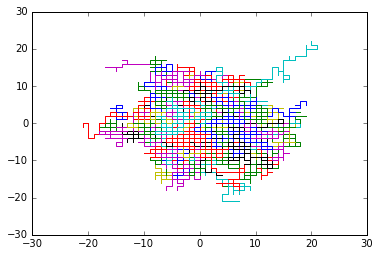

In [101]:
ends = []
for t in allpoints:
    xs = []
    ys = []
    ends.append(t[-1])
    for ent in t:
        xs.append(ent[0])
        ys.append(ent[1])
        
    plt.plot(xs, ys)
    
ends = np.array(ends)

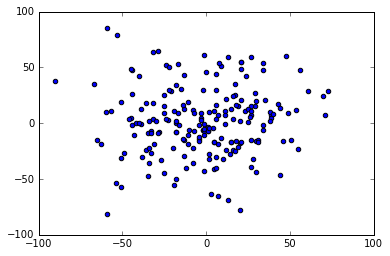

In [98]:
plt.scatter(ends[:, 0], ends[:, 1])

In [99]:
print("x = ", sum(ends[:, 0])/ trials)
print("y = ", sum(ends[:, 1]) / trials)

x =  -2.02
y =  1.89
